In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import itertools
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
wv2 = KeyedVectors.load_word2vec_format('~/toys/mienv3/datasets/PubMed-w2v.bin', binary=True)

In [3]:
wv2.wv.most_similar(positive='gene')

[('genes', 0.7986274361610413),
 ('gene-encoding', 0.7325981259346008),
 ('ETF1', 0.7128434181213379),
 ('men1', 0.6953920722007751),
 ('nagR', 0.6919228434562683),
 ('NVL3', 0.6910488605499268),
 ('Assignment1', 0.68581622838974),
 ('Monoallelic', 0.685641884803772),
 ('Eif4g3', 0.6844524145126343),
 ('sericin-1', 0.6842490434646606)]

In [30]:
def get_cleaned_text2(fname, max_len=999999):
    all_words = []
    with open(fname, 'r') as f:
        for n, line in enumerate(f):
            if n and n<max_len:
                line_id, line_text = line.split('||')
                line_letters = re.sub("[^a-zA-Z - 0-9 * _]", "", line_text) 
                line_letters_low = line_letters.lower()
                line_letters_low = stop_pattern.sub('', line_letters_low)
                line_words = line_letters_low.split()
                all_words.append(line_words)
                #all_words.append(line_letters_low)
                #print(len(all_words), len(line_letters_low))
    return all_words

def get_text_features(fname = '../data/training_text'):
    '''
    as a first approximation, let's estimate the mean vector of each text; 
    for later TODO some fancy projections
    
    '''
    wv_dim = wv2.wv.vector_size
    whole_text = get_cleaned_text2(fname)
    data_features = np.empty(shape=(len(whole_text), wv_dim))
    #wv_vocab = [w.lower() for w in list(wv2.vocab.keys())]
    for i, text in enumerate(whole_text):
        data_features[i,:] = np.array([wv2.wv[w] for w in text if w in wv2.wv.vocab]).mean(axis=0)
        print(len(text), len([wv2.wv[w] for w in text if w in wv2.vocab]))
    return data_features


stop_words = ['et', 'al', 'fig', 'figs', 'figure', 'table', 'also',
            'using', 'found', 'observed', 'however', 'previous', 'study',
            'although', 'studies', 'several', 'showed', 'could', 
            'performed', 'known', 'methods', 'whether', 'materials',
            'known', 'analyzed', 'within', 'show', 'respectively', 
            'thus', 'therefore', 'tested', 'among', 'abstract', 
            'introduction', 'may', 'shown', 'results', 'interestingly',
            'either', 'similarly', 'furthermore', 'consistently', 
            'neither']

stop_pattern = re.compile(r'\b(' + r'|'.\
            join(stopwords.words('english')+stop_words) + r')\b\s*')

train_data_features = get_text_features(fname = '../data/training_text')

#train_text2 = get_cleaned_text2(fname)

3772 3344
3493 3044
3493 3044
3447 3051
3757 3422
3757 3422
3757 3422
9285 8018
7448 6579
3691 3157
3757 3422
7820 6940
16176 14158
7820 6940
3757 3422
4063 3518
5041 4310
1914 1578
3757 3422
1914 1578
7250 6466
3757 3422
3757 3422
3447 3051
3447 3051
3447 3051
4275 3893
868 804
8717 8163
868 804
868 804
13410 12591
868 804
6046 5513
11409 10474
3415 2936
3415 2936
1627 1483
1627 1483
3925 3358
3925 3358
11000 9878
1627 1483
11659 10003
1211 1104
2264 1926
777 696
2264 1926
5224 4578
1211 1104
1504 1380
1504 1380
2566 2338
2264 1926
1504 1380
2264 1926
3805 3365
2264 1926
2715 2484
2043 1705
2264 1926
1211 1104
2043 1705
3777 3442
2264 1926
1504 1380
3777 3442
6099 5009
11743 9751
6099 5009
9585 8232
4686 4298
7088 6500
2451 2221
12475 10973
4686 4298
7954 7109
7954 7109
3942 3529
7954 7109
3942 3529
7954 7109
1543 1367
1543 1367
3569 3173
1543 1367
11078 9931
11078 9931
1454 1232
3188 2663
10111 8543
2363 1947
3188 2663
2363 1947
3989 3089
2869 2423
12850 11055
3872 3111
4229 3538
412

3588 3213
2808 2469
2808 2469
3588 3213
2808 2469
2808 2469
2808 2469
3588 3213
2808 2469
2808 2469
3588 3213
2808 2469
2808 2469
3588 3213
2808 2469
4000 3323
7233 6430
10686 9674
927 822
11464 9962
7312 6387
14874 13229
2925 2554
12114 10899
2735 2254
5399 4654
1896 1609
1693 1409
4385 3896
1042 845
5683 4878
2269 2088
2269 2088
2269 2088
2205 1967
2376 2158
2269 2088
2000 1889
2205 1996
2269 2088
4265 3786
5275 4631
2269 2088
2269 2088
1223 1099
5351 4846
3048 2729
1520 1382
2269 2088
2269 2088
4716 4193
1979 1826
4716 4193
2269 2088
2269 2088
2489 2240
9626 8249
7685 6765
7684 6692
7509 6474
7099 6321
115 101
2200 1925
2778 2370
3783 3398
2481 2253
3210 2787
2481 2253
3197 2762
5459 4877
3197 2762
2481 2253
3210 2787
2481 2253
3783 3398
2510 2220
3210 2787
5155 4655
2481 2253
3197 2762
3197 2762
5670 5138
5840 5198
3210 2787
3197 2762
2481 2253
2576 2286
3210 2787
6263 5532
2481 2253
3256 2758
2481 2253
3291 2931
2576 2286
5801 5151
2510 2220
3319 2918
3210 2787
2481 2253
3197 2762

4847 4058
234 222
11068 9823
4373 3713
4847 4058
4974 4459
9132 7990
4373 3713
3436 3195
7783 6591
3701 3219
5224 4605
5224 4605
3701 3219
3701 3219
5224 4605
7986 7151
5224 4605
3701 3219
2582 2314
1 1
3430 3181
6761 5849
3841 3320
12928 11526
6761 5849
3385 2774
4393 3857
4393 3857
3385 2774
3385 2774
4393 3857
3656 3173
2481 2120
3841 3320
9146 8167
9146 8167
9146 8167
407 337
10288 9138
1674 1440
4393 3857
4393 3857
2449 2130
2449 2130
6474 5497
4393 3857
4393 3857
3385 2774
4393 3857
4393 3857
6761 5849
2675 2348
6761 5849
4393 3857
12928 11526
9146 8167
12928 11526
12928 11526
3385 2774
9146 8167
1383 1181
4393 3857
12928 11526
13204 11694
9146 8167
3656 3173
2090 2003
9146 8167
3958 3327
4193 3995
3573 3444
2550 2296
2349 2156
2587 2318
16078 14568
5007 4752
3573 3444
1817 1620
4193 3995
20573 18638
4193 3995
620 551
7628 7185
4193 3995
3573 3444
16597 13944
4351 3704
6381 5544
2738 2454
3913 3463
4930 4470
2738 2454
3913 3463
4617 4161
4930 4470
2738 2454
2738 2454
5319 4733
94

2103 1950
3867 3402
15423 13562
3867 3402
3867 3402
6781 5914
3867 3402
17250 14371
2103 1950
3867 3402
2454 2294
2524 2179
3124 2844
3867 3402
3124 2844
9887 9070
3124 2844
5473 4854
7078 6374
2103 1950
3867 3402
4176 3490
4176 3490
4176 3490
8555 7728
3124 2844
3867 3402
6993 6266
13152 11809
3867 3402
8555 7728
5149 4721
20049 17870
4176 3490
4688 4326
9846 8662
4176 3490
3867 3402
7986 7080
11821 10663
4176 3490
7300 6334
4176 3490
3866 3143
4176 3490
2605 2424
3124 2844
9824 8513
4176 3490
4176 3490
8649 7843
6570 5969
1787 1582
19736 17271
5149 4721
18003 15884
4176 3490
6781 5914
6894 6102
4176 3490
2158 2007
6936 6303
3124 2844
6700 5669
4176 3490
16937 14635
12906 11365
5670 5172
26560 23469
8254 6985
3124 2844
3124 2844
3124 2844
11849 10390
6577 6029
2605 2424
4176 3490
5473 4854
3124 2844
4176 3490
138 125
7300 6334
5535 4947
8864 7816
3469 3019
4176 3490
5670 5172
8597 7698
1520 1304
4597 4081
3867 3402
3867 3402
4176 3490
3867 3402
11634 10353
4176 3490
2605 2424
3867 340

13062 10723
5655 5014
5182 4664
6794 5356
2807 2478
775 666
1777 1502
25183 21901
1777 1502
7118 5875
3114 2468
21102 18629
3114 2468
2318 1935
5673 5139
6365 5519
6294 5407
6365 5519
8615 7557
8615 7557
3926 3411
8615 7557
8653 7519
2368 1996
10011 8066
4851 3992
2242 1874
8189 7463
6219 5667
11847 10348
2355 2083
7434 6447
2506 2179
5036 4490
1171 1075
3182 2757
1171 1075
6640 6004
1563 1398
1171 1075
1171 1075
3712 3340
1013 904
3104 2557
7745 6881
3182 2757
4840 4186
3104 2557
2354 1957
3104 2557
2591 2186
3104 2557
1013 904
4341 3902
3166 2839
5168 4816
5539 4998
3104 2557
1331 1132
853 728
3182 2757
3744 3370
3182 2757
1171 1075
3182 2757
1846 1651
1171 1075
1171 1075
2415 2038
3148 2782
3104 2557
11313 9771
9058 8050
3745 3266
3988 3516
5958 5317
6744 5831
3550 3126
3745 3266
3550 3126
3745 3266
1102 1046
8978 8086
3774 3300
3988 3516
6030 5454
4963 4247
2872 2570
3988 3516
8764 7723
7426 6174
6869 6038
3745 3266
3345 2684
2959 2752
5958 5317


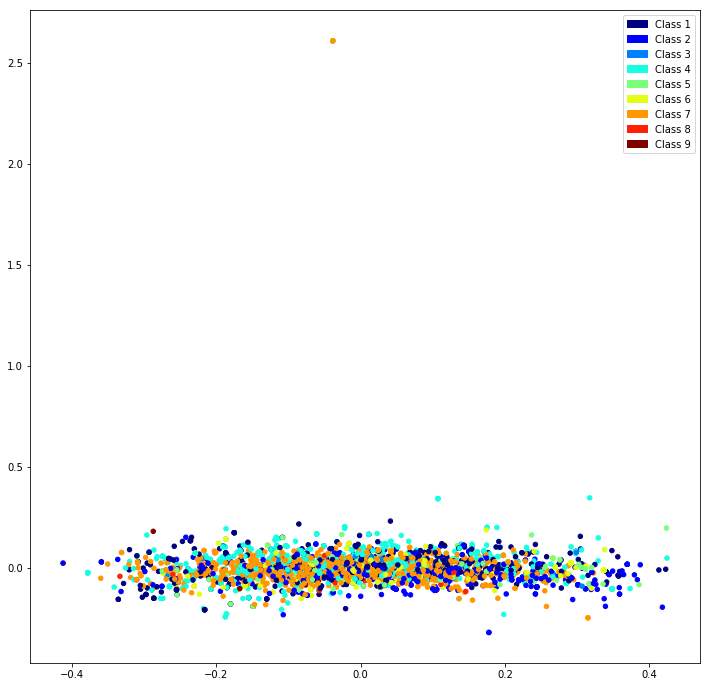

In [31]:
train_variants = pd.read_csv('../data/training_variants')
classes = train_variants.Class.values

pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(train_data_features)

from matplotlib.patches import Patch

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
cm = plt.get_cmap('jet', 9)
colors = [cm(i/9) for i in range(9)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in classes], cmap='jet', s=20)
#plt.legend(['Class ' +str(i+1) for i in range(9)])
plt.legend(handles=[Patch(color=colors[i], label='Class {}'.format(i+1)) for i in range(9)])
#plt.xlim([-0.4, 0.4])
#plt.ylim([-0.4, 0.4])

In [29]:
forest = RandomForestClassifier(n_estimators=300) 
forest = forest.fit(train_data_features, train_variants["Class"])

result_tr = forest.predict(train_data_features)
print("corr between prediction and real: ", np.corrcoef(result_tr, np.array(train_variants["Class"]))[0,1])

scores = cross_val_score(forest, train_data_features, train_variants["Class"], cv=10, n_jobs=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

corr between prediction and real:  0.878424070394
[ 0.44047619  0.47916667  0.43113772  0.41741742  0.33933934  0.4246988
  0.52870091  0.61212121  0.58662614  0.41590214]
Accuracy: 0.47 (+/- 0.08)


PubMed w2v model seems didn't improve the results compared to w2v trained on the data..

TODO: loaded w2v model uses upper/lower cases..figure out how to consider only lower instead

I can try to produce a solution anyway..hope the RAM will survive

In [10]:
test_data_features = get_text_features('../data/test_text')

In [42]:
result = forest.predict(test_data_features)
result_mat = np.zeros((len(result), 9))
    
test_id = np.arange(len(result))

result_mat[test_id, result-1] = 1
result_mat = result_mat.astype(int)
output = pd.DataFrame( data={"ID":test_id, "class1":result_mat[:,0],
        "class2":result_mat[:,1],
        "class3":result_mat[:,2],
        "class4":result_mat[:,3],
        "class5":result_mat[:,4],
        "class6":result_mat[:,5],
        "class7":result_mat[:,6],
        "class8":result_mat[:,7],
        "class9":result_mat[:,8]
        } )
output.to_csv( "pubmed_w2v_on_text_cases_mixed.csv", index=False)

In [14]:
train_data_features[0]

array([ -4.94713970e-02,   1.40805934e-02,  -3.80985066e-02,
        -1.38008350e-03,  -1.67235047e-01,  -3.52673419e-03,
        -9.45151597e-02,  -7.84332901e-02,   4.02512290e-02,
        -3.67538482e-02,   7.53008798e-02,   8.71239081e-02,
        -3.91828381e-02,   6.31278008e-02,   5.26032737e-03,
        -4.62985113e-02,  -3.21426317e-02,   4.47356589e-02,
         4.42279503e-02,   6.05305843e-03,   6.38758466e-02,
        -1.24425273e-02,   3.07911467e-02,   2.07143533e-03,
        -2.03445200e-02,  -6.35208935e-02,   7.91978166e-02,
         1.94221102e-02,  -7.25236535e-02,   1.07926756e-01,
         9.05904081e-03,  -2.17135698e-02,  -1.43220532e-04,
        -1.05192205e-02,  -3.23195346e-02,   3.35231237e-02,
        -5.08997962e-02,   5.98578155e-02,  -9.10095125e-02,
        -3.86926271e-02,   6.11082214e-05,  -5.45057729e-02,
         1.88360177e-02,  -4.48472686e-02,   1.55439705e-03,
        -7.21661299e-02,  -1.87373310e-02,  -4.64250557e-02,
        -5.80882095e-02,

In [40]:
list(wv2.vocab.keys())

['</s>',
 '.',
 'of',
 'the',
 ',',
 'and',
 'in',
 'to',
 ')',
 '(',
 'a',
 'with',
 'for',
 'was',
 'The',
 'were',
 'by',
 'is',
 'that',
 'on',
 '%',
 'from',
 'patients',
 'as',
 'or',
 'are',
 'be',
 'an',
 'at',
 'not',
 'cells',
 'this',
 'In',
 ':',
 'study',
 ']',
 '[',
 'A',
 'which',
 'have',
 'than',
 ';',
 'after',
 'between',
 'treatment',
 'these',
 'cell',
 'but',
 'We',
 'been',
 'has',
 'results',
 '=',
 'This',
 'may',
 'during',
 'using',
 'had',
 'activity',
 'group',
 'both',
 'also',
 'two',
 'their',
 'can',
 'disease',
 '1',
 'we',
 'more',
 'protein',
 'used',
 '2',
 'levels',
 'increased',
 'effect',
 'effects',
 'human',
 'found',
 'clinical',
 'analysis',
 'other',
 'expression',
 'significantly',
 'all',
 'no',
 'associated',
 '+/-',
 'data',
 "'s",
 'significant',
 '"',
 'compared',
 '<',
 'its',
 'studies',
 'different',
 'These',
 'showed',
 'control',
 'P',
 'it',
 'one',
 'cases',
 'into',
 'years',
 'high',
 'cancer',
 'blood',
 'use',
 '3',
 'gene'

In [62]:
wv2.wv.